In [60]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter
import random
from random import *

### 가장 단순한 마피아 게임

In [62]:
class Mafia:
    
    def __init__(self,num_mafia, num_civil):
        self.winner_list = []
        self.num_mafia = num_mafia
        self.num_civil = num_civil
        self.loop = 1000
    
    def endcheck(self,mafia,civ):
        if(mafia == 0) : 
            self.winner_list.append(0)
            return True
        elif(mafia >= civ) : 
            self.winner_list.append(1)
            return True
            
        return False
        
    def daytime(self,mafia,civ):
        
        vote = randint(1, mafia + civ)
        if(vote <= mafia):
            mafia -= 1
        else :
            civ -= 1
            
        return mafia,civ
        
    def nighttime(self,mafia,civ):
        civ -= 1
        
        return mafia,civ
    
    def play_game(self):
        
        mafia = self.num_mafia
        civ = self.num_civil
        days = 0
        
        while(1):
            days += 1
            mafia,civ = self.daytime(mafia,civ)
            if(self.endcheck(mafia,civ) == True): break
            mafia,civ = self.nighttime(mafia,civ)
            if(self.endcheck(mafia,civ) == True): break
    
    def print_result(self):
        mafia_win = 0
        for i in range(len(self.winner_list)):
            if self.winner_list[i] == 1:
                mafia_win += 1
        
        #print("총 %d명 중 마피아가 %d명 일 때 마피아의 승률은 %lf 입니다." % (self.num_mafia + self.num_civil,self.num_mafia, mafia_win / self.loop * 100))
        
        return mafia_win / self.loop * 100
                
            
    def process(self):
        for i in range(self.loop):
            self.play_game()
            
        result = self.print_result()
        
        return result

### 1000회씩 마피아게임을 실행한 결과값을 5번 반복해 평균값을 결과값으로

In [63]:
list_result = []
cycle = 5

def append_resultlist(num_mafia, num_civ):
    sum = 0.0
    avg = 0.0
    for i in range(cycle):
        mafia1 = Mafia(num_mafia,num_civ)
        sum += mafia1.process()
    
    avg = sum / cycle
    list_result.append(avg)
    


### 10명기준 가장 간단한 마피아게임

[48.199999999999996, 78.03999999999999, 93.02000000000001, 98.74000000000001]


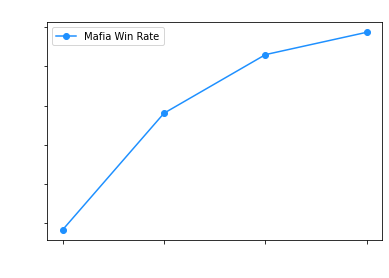

In [64]:
append_resultlist(1,9)
append_resultlist(2,8)
append_resultlist(3,7)
append_resultlist(4,6)

print(list_result)
list_simple_simple_10 = list_result

label = [1,2,3,4]

plt.plot(list(range(1,5)), list_result, color='dodgerblue', marker='o')
plt.title('Simple Mafia Game', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 50명기준 가장 간단한 마피아게임

[23.32, 40.16, 55.779999999999994, 67.34, 76.2, 84.1, 88.56, 93.12, 95.35999999999999, 97.3, 98.28, 98.94000000000001, 99.53999999999999, 99.78, 99.92, 99.92, 100.0, 100.0, 100.0, 100.0]


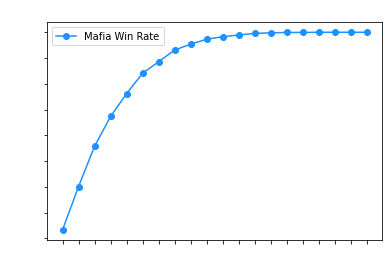

In [65]:
list_result = []

append_resultlist(1,49)
append_resultlist(2,48)
append_resultlist(3,47)
append_resultlist(4,46)
append_resultlist(5,45)
append_resultlist(6,44)
append_resultlist(7,43)
append_resultlist(8,42)
append_resultlist(9,41)
append_resultlist(10,40)
append_resultlist(11,39)
append_resultlist(12,38)
append_resultlist(13,37)
append_resultlist(14,36)
append_resultlist(15,35)
append_resultlist(16,34)
append_resultlist(17,33)
append_resultlist(18,32)
append_resultlist(19,31)
append_resultlist(20,30)

print(list_result)
list_simple_simple_50 = list_result

label = list(range(1,21))

plt.plot(list(range(1,21)), list_result, color='dodgerblue', marker='o')
plt.title('Simple Mafia Game', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 수정한 간단한 마피아 게임

In [66]:
class Mafia_team(Mafia):
    
    def __init__(self,num_mafia, num_civil):
        super().__init__(num_mafia,num_civil)
        self.total_people = num_mafia + num_civil
        self.mafia_exposed = False # 마피아 팀에서 마피아가 투표로 죽어 마피아인게 발각될 시
        
        self.team_mafia = num_mafia * 2 # 마피아팀의 수 = 마피아 수 + 각 마피아가 데려온 시민 1명씩
        self.team_civil = self.team_mafia # 시민팀 수는 마피아 팀 수와 동일
        self.team_neutral = self.total_people - self.team_mafia - self.team_civil # 중립팀은 전체에서 두 팀을 뺀 나머지
        
    def team_check(self,mafia,t_mf,t_cv,t_nt):
        if(t_cv == 0 and t_nt == 0): # 마피아 팀의 시민을 제외하고 모두가 사망하면
            t_nt = t_mf - mafia # 마피아 팀에 있던 시민은 중립팀으로 이동하고
            t_mf = mafia # 마피아 팀에 있던 마피아는 남아있음
        return t_mf,t_cv,t_nt
    
    def realize(self,mafia,t_mf,t_cv,t_nt):
        tmp = t_mf - mafia # 마피아 팀에 있던 시민 수
        t_mf -= tmp
        t_cv += tmp
        t_cv += t_nt
        t_nt = 0
        
        return t_mf,t_cv,t_nt
    
    def daytime(self,mafia,civ,t_mf,t_cv,t_nt):
        # 일반적인 투표 상황
        if(t_cv != 0): vote = {1: t_cv, 2: t_mf, 3: 0} # 1: 마피아팀의 득표수 2: 시민팀 득표수 3: 중립팀 득표수
        # 시민팀이 모두 죽고 중립팀만 남은상황
        else : vote = {1: 0, 2: 0, 3: t_mf}
        
        for i in range(t_nt) : # 중립팀이 투표할 차례
            vote_nt = randint(1,3)
            if(vote_nt == 1): vote[1] += 1 # 마피아팀에 투표
            elif(vote_nt == 2): 
                if(t_cv != 0): vote[2] += 1 # 시민팀에 투표
                else: i -= 1 # 시민팀이 없을 때 시민팀에 투표하면 재투표
            elif(vote_nt == 3): vote[3] += 1 # 중립팀에 투표
            
        vote_max = max(vote.keys(), key = lambda k: vote[k]) # 가장 많은 득표를 얻은 팀을 구함
        
        for i in range(1,4) :
            if(i == vote_max): continue
            if(vote[vote_max] == vote[i]): # 투표가 동률로 이번 투표에선 아무도 죽이지 않는다.
                return mafia,civ,t_mf,t_cv,t_nt
        
        if(vote_max == 1): # 가장 많은 득표가 마피아 팀일때
            if(self.mafia_exposed): # 이미 마피아가 발각되어 마피아만 마피아 팀에 존재
                t_mf -= 1
                mafia -= 1
            else: # 마피아가 발각되지 않았을 경우 시민도 마피아 팀에 있음
                kill = randint(1, t_mf)
                if(kill <= mafia): # 투표로 마피아를 죽이게 될 경우
                    t_mf -= 1
                    mafia -= 1
                    if(not self.mafia_exposed):
                        self.mafia_exposed = True # 마피아가 죽었으므로 마피아 팀 발각
                        t_mf,t_cv,t_nt = self.realize(mafia,t_mf,t_cv,t_nt) # 마피아팀과 중립팀에 있던 시민들은 시민팀으로 이동
                else: # 투표로 마피아팀의 시민을 죽인 경우
                    t_mf -= 1
                    civ -= 1
                
        elif(vote_max == 2): # 가장 많은 득표가 시민 팀일때
            t_cv -= 1
            civ -= 1
        elif(vote_max == 3): # 가장 많은 득표가 중립 팀일때
            t_nt -= 1
            civ -= 1
            
        return mafia,civ,t_mf,t_cv,t_nt
        
    def nighttime(self,mafia,civ,t_cv,t_nt):
        
        if(t_cv > 0 and t_nt > 0):
            kill = randint(1,2)
            if(kill == 1): t_cv -= 1
            elif(kill == 2): t_nt -= 1
        elif(t_cv > 0 and t_nt <= 0):
            t_cv -= 1
        elif(t_cv <= 0 and t_nt > 0):
            t_nt -= 1
        
        civ -= 1
        
        return mafia,civ,t_cv,t_nt
    
    def play_game(self):
        
        mafia = self.num_mafia
        civ = self.num_civil
        days = 0
        team_mafia = self.num_mafia * 2
        team_civil = team_mafia
        team_neutral = self.total_people - team_mafia - team_civil
        self.mafia_exposed = False
        
        #print("mafia : %d, civil : %d, t_mf : %d, t_cv : %d, t_nt : %d" 
         #     % (self.num_mafia, self.num_civil, team_mafia, team_civil, team_neutral))
        
        while(1):
            days += 1
            mafia,civ,team_mafia,team_civil,team_neutral = self.daytime(mafia,civ,team_mafia,team_civil,team_neutral)
            team_mafia,team_civil,team_neutral = self.team_check(mafia,team_mafia,team_civil,team_neutral)
            if(self.endcheck(mafia,civ) == True): break
            
            mafia,civ,team_civil,team_neutral = self.nighttime(mafia,civ,team_civil,team_neutral)
            team_mafia,team_civil,team_neutral = self.team_check(mafia,team_mafia,team_civil,team_neutral)
            if(self.endcheck(mafia,civ) == True): break
                

### 10명기준 수정한 간단한 마피아 게임

[54.38000000000001, 68.1]


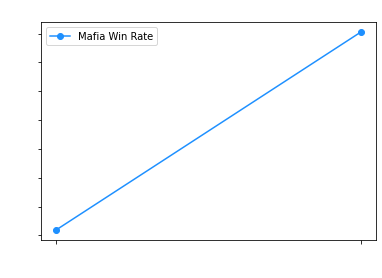

In [67]:
def append_resultlist(num_mafia, num_civ):
    sum = 0.0
    avg = 0.0
    for i in range(cycle):
        mafia1 = Mafia_team(num_mafia,num_civ)
        sum += mafia1.process()
    
    avg = sum / cycle
    list_result.append(avg)

    
list_result = []
append_resultlist(1,9)
append_resultlist(2,8)

print(list_result)
list_modi_simple_10 = list_result

label = list(range(1,3))

plt.plot(list(range(1,3)), list_result, color='dodgerblue', marker='o')
plt.title('Modified Mafia Game', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 50명기준 수정한 간단한 마피아 게임

[0.18, 5.220000000000001, 20.360000000000003, 31.9, 35.059999999999995, 38.4, 41.1, 42.980000000000004, 47.5, 51.44]


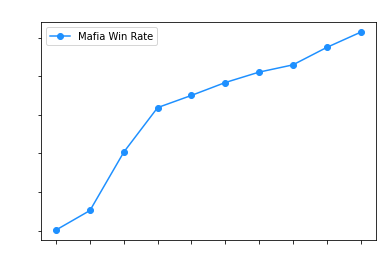

In [68]:
list_result = []

append_resultlist(1,49)
append_resultlist(2,48)
append_resultlist(3,47)
append_resultlist(4,46)
append_resultlist(5,45)
append_resultlist(6,44)
append_resultlist(7,43)
append_resultlist(8,42)
append_resultlist(9,41)
append_resultlist(10,40)

print(list_result)
list_modi_simple_50 = list_result

label = list(range(1,11))

plt.plot(list(range(1,11)), list_result, color='dodgerblue', marker='o')
plt.title('Modified Mafia Game', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 경찰이 추가된 단순한 마피아 게임

In [69]:
class Mafia_police(Mafia):
    
    def __init__(self,num_mafia, num_civil,num_police):
        super().__init__(num_mafia,num_civil)
        self.num_police = num_police
        self.num_civil = num_civil + num_police
        
        self.mafia_found = False
        self.mafia_showdown = 0
       

    def daytime(self,mafia,civ,pol):
        
        if(self.mafia_found and pol > 0): # 경찰이 밤에 마피아를 찾음
            self.mafia_found = False
            
            vote = randint(1, 2)
            if(vote == 1): # 경찰의 수사로 마피아가 투표로 사망
                mafia -= 1
                self.mafia_showdown = 1 # 이제 마피아가 밤에 그 경찰을 죽입니다.
            elif(vote == 2): # 경찰의 수사로 경찰이 투표로 사망
                pol -= 1
                civ -= 1
                self.mafia_showdown = 2 # 다음 낮 투표에 지목된 마피아를 죽입니다.
                
        elif(self.mafia_showdown == 2): # 지목된 마피아를 죽일 차례
            mafia -= 1
            self.mafia_showdown = 0
        
        else: # 경찰이 밤에 마피아를 못 찾음
            vote = randint(1, mafia + civ)
            if(vote <= mafia): # 마피아가 투표로 죽음
                mafia -= 1
            elif(vote > mafia and vote <= mafia + pol) : # 경찰이 투표로 죽음
                pol -= 1
                civ -= 1
            else : # 시민이 투표로 죽음
                civ -= 1
            
        return mafia,civ,pol
        
    def nighttime(self,mafia,civ,pol):
        if(self.mafia_showdown == 1): # 수사를 진행한 경찰을 죽임
            pol -= 1
            civ -= 1
            self.mafia_showdown = 0
        else :
            kill = randint(1, civ) # 마피아의 경찰 살해 시도
            if(kill <= pol): 
                pol -= 1
            civ -= 1

        if(pol > 0):
            investigation = randint(1, mafia + civ -pol + 1) # 경찰의 수사 시도 (살해되기전 확률로 계산)
            if(investigation <= mafia):
                self.mafia_found = True # 경찰이 마피아를 찾음

        return mafia,civ,pol
    
    def play_game(self):
        
        mafia = self.num_mafia
        civ = self.num_civil
        pol = self.num_police
        days = 0
        
        while(1):
            days += 1
            mafia,civ,pol = self.daytime(mafia,civ,pol)
            if(self.endcheck(mafia,civ) == True): break
            mafia,civ,pol = self.nighttime(mafia,civ,pol)
            if(self.endcheck(mafia,civ) == True): break

In [70]:
list_result = []
cycle = 5

def append_resultlist(num_mafia, num_civ,num_pol):
    sum = 0.0
    avg = 0.0
    for i in range(cycle):
        mafia1 = Mafia_police(num_mafia,num_civ,num_pol)
        sum += mafia1.process()
    
    avg = sum / cycle
    list_result.append(avg)

### 10인 경찰이 추가된 간단한 마피아 게임

[40.519999999999996, 69.2, 89.02, 98.06]


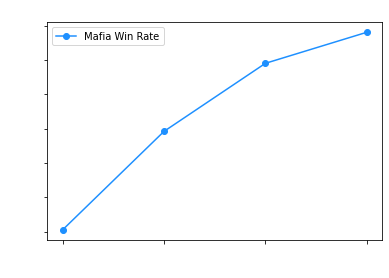

In [71]:
list_result = []
append_resultlist(1,8,1)
append_resultlist(2,7,1)
append_resultlist(3,6,1)
append_resultlist(4,5,1)

print(list_result)
list_simple_pol_10 = list_result

label = [1,2,3,4]

plt.plot(list(range(1,5)), list_result, color='dodgerblue', marker='o')
plt.title('Simple Mafia Game + Police 1', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 50인 경찰이 추가된 간단한 마피아 게임

[8.64, 18.2, 29.82, 41.86, 53.4, 63.7, 72.22, 81.86, 86.44, 91.96000000000001, 94.84, 96.8, 98.25999999999999, 99.03999999999999, 99.52000000000001, 99.84, 99.82000000000001, 99.96, 99.97999999999999, 100.0]


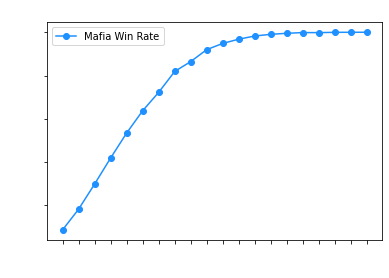

In [72]:
list_result = []

append_resultlist(1,44,5)
append_resultlist(2,43,5)
append_resultlist(3,42,5)
append_resultlist(4,41,5)
append_resultlist(5,40,5)
append_resultlist(6,39,5)
append_resultlist(7,38,5)
append_resultlist(8,37,5)
append_resultlist(9,36,5)
append_resultlist(10,35,5)
append_resultlist(11,34,5)
append_resultlist(12,33,5)
append_resultlist(13,32,5)
append_resultlist(14,31,5)
append_resultlist(15,30,5)
append_resultlist(16,29,5)
append_resultlist(17,28,5)
append_resultlist(18,27,5)
append_resultlist(19,26,5)
append_resultlist(20,25,5)

print(list_result)
list_simple_pol_50 = list_result

label = list(range(1,21))

plt.plot(list(range(1,21)), list_result, color='dodgerblue', marker='o')
plt.title('Simple Mafia Game + Police 5', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 경찰이 추가된 수정된 마피아 게임

In [74]:
class Mafia_team_police(Mafia_team):
    
    def __init__(self,num_mafia, num_civil,num_police):
        super().__init__(num_mafia,num_civil)
        self.total_people = num_mafia + num_civil + num_police
    
        self.num_civil = num_civil + num_police
        self.num_police = num_police
        self.mafia_found = False
        self.mafia_showdown = 0
        self.police_in_nt = True
    
    def daytime(self,mafia,civ,pol,t_mf,t_cv,t_nt):
        if(self.mafia_found and pol > 0): # 경찰이 마피아를 찾아냄
            self.mafia_found = False
            
            vote = randint(1, 2)
            if(vote == 1): # 경찰의 수사로 마피아가 투표로 사망
                t_mf -= 1
                mafia -= 1
                self.mafia_showdown = 1 # 이제 마피아가 밤에 그 경찰을 죽입니다.
            elif(vote == 2): # 경찰의 수사로 경찰이 투표로 사망
                if(self.police_in_nt) : t_nt -= 1 # 경찰이 중립팀에 있을 때
                else : t_cv -= 1 # 경찰이 시민팀에 있을 때
                pol -= 1
                civ -= 1
                self.mafia_showdown = 2 # 다음 낮 투표에 지목된 마피아를 죽입니다.
            self.mafia_exposed = True
            self.realize(mafia,t_mf,t_cv,t_nt) # 마피아가 밝혀지므로 모든 시민은 시민팀으로 이동
            self.police_in_nt = False
            return mafia,civ,pol,t_mf,t_cv,t_nt
                
        elif(self.mafia_showdown == 2): # 지목된 마피아를 죽일 차례
            t_mf -= 1
            mafia -= 1
            self.mafia_showdown = 0
            return mafia,civ,pol,t_mf,t_cv,t_nt
        
        # 일반적인 투표 상황
        if(t_cv != 0): vote = {1: t_cv, 2: t_mf, 3: 0} # 1: 마피아팀의 득표수 2: 시민팀 득표수 3: 중립팀 득표수
        # 시민팀이 모두 죽고 중립팀만 남은상황
        else : vote = {1: 0, 2: 0, 3: t_mf}
        
        for i in range(t_nt) : # 중립팀이 투표할 차례
            vote_nt = randint(1,3)
            if(vote_nt == 1): vote[1] += 1 # 마피아팀에 투표
            elif(vote_nt == 2): 
                if(t_cv != 0): vote[2] += 1 # 시민팀에 투표
                else: i -= 1 # 시민팀이 없을 때 시민팀에 투표하면 재투표
            elif(vote_nt == 3): vote[3] += 1 # 중립팀에 투표
            
        vote_max = max(vote.keys(), key = lambda k: vote[k]) # 가장 많은 득표를 얻은 팀을 구함
        
        for i in range(1,4) :
            if(i == vote_max): continue
            if(vote[vote_max] == vote[i]): # 투표가 동률로 이번 투표에선 아무도 죽이지 않는다.
                return mafia,civ,pol,t_mf,t_cv,t_nt
        
        if(vote_max == 1): # 가장 많은 득표가 마피아 팀일때
            if(self.mafia_exposed): # 이미 마피아가 발각되어 마피아만 마피아 팀에 존재
                t_mf -= 1
                mafia -= 1
            else: # 마피아가 발각되지 않았을 경우 시민도 마피아 팀에 있음
                kill = randint(1, t_mf)
                if(kill <= mafia): # 투표로 마피아를 죽이게 될 경우
                    t_mf -= 1
                    mafia -= 1
                    if(not self.mafia_exposed):
                        self.mafia_exposed = True # 마피아가 죽었으므로 마피아 팀 발각
                        t_mf,t_cv,t_nt = self.realize(mafia,t_mf,t_cv,t_nt) # 마피아팀과 중립팀에 있던 시민들은 시민팀으로 이동
                else: # 투표로 마피아팀의 시민을 죽인 경우
                    t_mf -= 1
                    civ -= 1
                
        elif(vote_max == 2): # 가장 많은 득표가 시민 팀일때
            if(not self.police_in_nt) : # 경찰이 시민팀에 있을 때
                kill = randint(1, t_cv)
                if(kill <= pol): # 시민팀에 있는 경찰이 죽음
                    t_cv -= 1
                    pol -= 1
                    civ -= 1
                else:            # 시민팀에 있는 시민이 죽음
                    t_cv -= 1
                    civ -= 1
            else :                      # 시민팀에 시민만 있을 때
                t_cv -= 1
                civ -= 1
        elif(vote_max == 3): # 가장 많은 득표가 중립 팀일때
            if(self.police_in_nt) :  # 경찰이 중립팀에 있을 때
                kill = randint(1, t_nt)
                if(kill <= pol): # 중립팀에 있는 경찰이 죽음
                    t_nt -= 1
                    pol -= 1
                    civ -= 1
                else:           # 중립팀에 있는 시민이 죽음
                    t_nt -= 1
                    civ -= 1
            else :           # 중립팀에 시민만 있을 때
                t_nt -= 1
                civ -= 1
            
        return mafia,civ,pol,t_mf,t_cv,t_nt
        
    def nighttime(self,mafia,civ,pol,t_mf,t_cv,t_nt):

        if(self.mafia_showdown == 1): # 수사를 진행한 경찰을 죽임
            pol -= 1
            civ -= 1
            self.mafia_showdown = 0
        else :
            if(t_cv > 0 and t_nt > 0): # 중립팀과 시민팀 중 1명을 죽임
                kill_team = randint(1,2)
                if(kill_team == 1): # 시민팀에 있는 1명을 죽임
                    if(not self.police_in_nt): # 경찰이 시민팀에 존재할때
                        kill = randint(1,t_cv)
                        if(kill <= pol): # 경찰이 죽음
                            pol -= 1
                        t_cv -= 1
                        civ -= 1
                    else :            # 시민만 경찰팀에 존재할때
                        t_cv -= 1
                        civ -= 1

                elif(kill_team == 2): # 중립팀에 있는 1명을 죽임
                    if(not self.police_in_nt): # 경찰이 중립팀에 존재할때
                        kill = randint(1,t_cv)
                        if(kill <= pol): # 경찰이 죽음
                            pol -= 1
                        t_cv -= 1
                        civ -= 1
                    else :            # 시민만 중립팀에 존재할때
                        t_cv -= 1
                        civ -= 1
            elif(t_cv > 0 and t_nt <= 0): # 시민팀에만 시민+경찰이 존재
                if(not self.police_in_nt): # 경찰이 시민팀에 존재할때
                    kill = randint(1,t_cv)
                    if(kill <= pol): # 경찰이 죽음
                        pol -= 1
                    t_cv -= 1
                    civ -= 1
                else :            # 시민만 시민팀에 존재할때
                    t_cv -= 1
                    civ -= 1
                        
            elif(t_cv <= 0 and t_nt > 0): # 중립팀에만 시민+경찰이 존재
                if(self.police_in_nt): # 경찰이 시민팀에 존재할때
                    kill = randint(1,t_nt)
                    if(kill <= pol): # 경찰이 죽음
                        pol -= 1
                    t_nt -= 1
                    civ -= 1
                else :            # 시민만 중립팀에 존재할때
                    t_nt -= 1
                    civ -= 1

        if(pol > 0 and not self.mafia_exposed):
            investigation = randint(1, mafia + civ -pol + 1) # 경찰의 수사 시도 (살해되기전 확률로 계산)
            if(investigation <= mafia):
                self.mafia_found = True # 경찰이 마피아를 찾음

        return mafia,civ,pol,t_mf,t_cv,t_nt
    
    def play_game(self):
        
        mafia = self.num_mafia
        civ = self.num_civil
        pol = self.num_police
        days = 0
        team_mafia = self.num_mafia * 2
        team_civil = team_mafia
        team_neutral = self.total_people - team_mafia - team_civil
        self.mafia_exposed = False
        self.police_in_nt = True
        
        while(1):
            days += 1
            mafia,civ,pol,team_mafia,team_civil,team_neutral = self.daytime(mafia,civ,pol,team_mafia,team_civil,team_neutral)
            team_mafia,team_civil,team_neutral = self.team_check(mafia,team_mafia,team_civil,team_neutral)
            if(self.endcheck(mafia,civ) == True): break

            mafia,civ,pol,team_mafia,team_civil,team_neutral = self.nighttime(mafia,civ,pol,team_mafia,team_civil,team_neutral)
            team_mafia,team_civil,team_neutral = self.team_check(mafia,team_mafia,team_civil,team_neutral)
            if(self.endcheck(mafia,civ) == True): break

### 10인 기준 경찰이 추가된 수정된 마피아 게임

[44.44, 71.16]


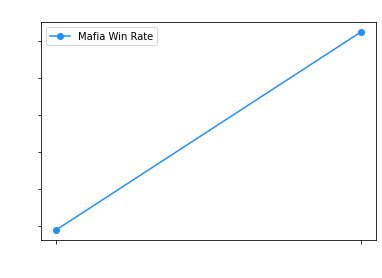

In [76]:
def append_resultlist(num_mafia, num_civ, num_pol):
    sum = 0.0
    avg = 0.0
    for i in range(cycle):
        mafia1 = Mafia_team_police(num_mafia,num_civ, num_pol)
        sum += mafia1.process()
    
    avg = sum / cycle
    list_result.append(avg)

    
list_result = []
append_resultlist(1,8,1)
append_resultlist(2,7,1)

print(list_result)
list_modi_pol_10 = list_result

label = list(range(1,3))

plt.plot(list(range(1,3)), list_result, color='dodgerblue', marker='o')
plt.title('Modified Mafia Game + Police 1', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 50인 기준 경찰이 추가된 수정된 마피아 게임

[0.06000000000000001, 3.72, 23.42, 45.239999999999995, 52.760000000000005, 54.94000000000001, 58.58, 61.44, 64.85999999999999, 67.72]


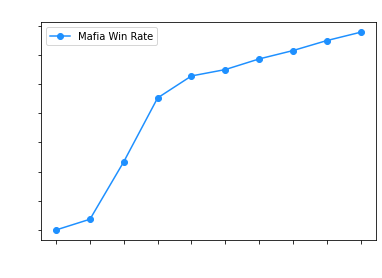

In [77]:
list_result = []

append_resultlist(1,44,5)
append_resultlist(2,43,5)
append_resultlist(3,42,5)
append_resultlist(4,41,5)
append_resultlist(5,40,5)
append_resultlist(6,39,5)
append_resultlist(7,38,5)
append_resultlist(8,37,5)
append_resultlist(9,36,5)
append_resultlist(10,35,5)

print(list_result)
list_modi_pol_50 = list_result

label = list(range(1,11))

plt.plot(list(range(1,11)), list_result, color='dodgerblue', marker='o')
plt.title('Modified Mafia Game + Police 5', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 의사가 추가된 단순한 마피아 게임

In [78]:
class Mafia_doctor(Mafia):
    
    def __init__(self,num_mafia, num_civil,num_doc):
        super().__init__(num_mafia,num_civil)
        self.num_doc = num_doc
        self.num_civil = num_civil + num_doc
        
       

    def daytime(self,mafia,civ,doc):
        vote = randint(1, mafia + civ)

        if(doc > 0): # 의사가 살아 있을때
            if(vote <= doc):
                doc -= 1
                civ -= 1
            elif(vote <= (mafia + doc) and vote > doc):
                mafia -= 1
            else :
                civ -= 1

        else:       # 의사가 모두 죽었을 때
            if(vote <= mafia):
                mafia -= 1
            else :
                civ -= 1

        return mafia,civ,doc
        
    def nighttime(self,mafia,civ,doc):
        if(doc > 0):
            heal = randint(1, mafia + civ)
            if(heal != 1): # 의사가 치료에 실패
                kill = randint(1,civ)
                if(kill <= doc) : # 의사가 죽음
                    doc -= 1
                    civ -= 1
                else :
                    civ -= 1 # 시민이 죽음
        else : 
            civ -= 1
        
        return mafia,civ,doc
    
    def play_game(self):
        
        mafia = self.num_mafia
        civ = self.num_civil
        doc = self.num_doc
        days = 0
        
        while(1):
            days += 1
            mafia,civ,doc = self.daytime(mafia,civ,doc)
            if(self.endcheck(mafia,civ) == True): break
            mafia,civ,doc = self.nighttime(mafia,civ,doc)
            if(self.endcheck(mafia,civ) == True): break

### 10인 기준 의사가 추가된 단순한 마피아 게임

[44.559999999999995, 74.38000000000001, 89.9, 97.58]


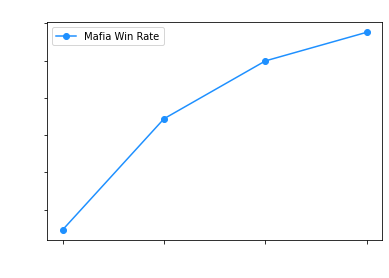

In [79]:
list_result = []
cycle = 5

def append_resultlist(num_mafia, num_civ,num_pol):
    sum = 0.0
    avg = 0.0
    for i in range(cycle):
        mafia1 = Mafia_doctor(num_mafia,num_civ,num_pol)
        sum += mafia1.process()
    
    avg = sum / cycle
    list_result.append(avg)
    
    
list_result = []
append_resultlist(1,8,1)
append_resultlist(2,7,1)
append_resultlist(3,6,1)
append_resultlist(4,5,1)

print(list_result)
list_doc_10 = list_result

label = [1,2,3,4]

plt.plot(list(range(1,5)), list_result, color='dodgerblue', marker='o')
plt.title('Simple Mafia Game + Doctor 1', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 50인 기준 의사가 추가된 단순한 마피아 게임

[20.520000000000003, 35.919999999999995, 49.56, 61.4, 71.6, 78.94000000000001, 85.42, 89.74000000000001, 93.56, 94.69999999999999, 97.52000000000001, 98.34, 99.25999999999999, 99.08000000000001, 99.78, 99.82000000000001, 99.9, 99.97999999999999, 100.0, 99.97999999999999]


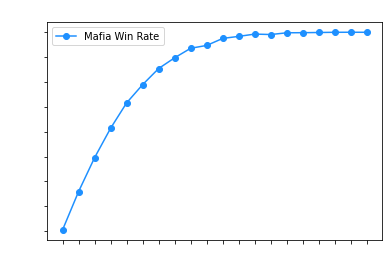

In [80]:
list_result = []

append_resultlist(1,44,5)
append_resultlist(2,43,5)
append_resultlist(3,42,5)
append_resultlist(4,41,5)
append_resultlist(5,40,5)
append_resultlist(6,39,5)
append_resultlist(7,38,5)
append_resultlist(8,37,5)
append_resultlist(9,36,5)
append_resultlist(10,35,5)
append_resultlist(11,34,5)
append_resultlist(12,33,5)
append_resultlist(13,32,5)
append_resultlist(14,31,5)
append_resultlist(15,30,5)
append_resultlist(16,29,5)
append_resultlist(17,28,5)
append_resultlist(18,27,5)
append_resultlist(19,26,5)
append_resultlist(20,25,5)

print(list_result)
list_doc_50 = list_result


label = list(range(1,21))

plt.plot(list(range(1,21)), list_result, color='dodgerblue', marker='o')
plt.title('Simple Mafia Game + Doctor 5', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 의사와 경찰이 추가된 단순한 마피아 게임

In [81]:
class Mafia_full(Mafia):
    
    def __init__(self,num_mafia, num_civil,num_police,num_doctor):
        super().__init__(num_mafia,num_civil)
        self.num_police = num_police
        self.num_doctor = num_doctor
        self.num_civil = num_civil + num_police + num_doctor
        
        self.mafia_found = False
        self.mafia_showdown = 0
       

    def daytime(self,mafia,civ,pol,doc):
        
        if(self.mafia_found and pol > 0): # 경찰이 밤에 마피아를 찾음
            self.mafia_found = False
            
            vote = randint(1, 2)
            if(vote == 1): # 경찰의 수사로 마피아가 투표로 사망
                mafia -= 1
                self.mafia_showdown = 1 # 이제 마피아가 밤에 그 경찰을 죽입니다.
            elif(vote == 2): # 경찰의 수사로 경찰이 투표로 사망
                pol -= 1
                civ -= 1
                self.mafia_showdown = 2 # 다음 낮 투표에 지목된 마피아를 죽입니다.
                
        elif(self.mafia_showdown == 2): # 지목된 마피아를 죽일 차례
            mafia -= 1
            self.mafia_showdown = 0
        
        else: # 경찰이 밤에 마피아를 못 찾음
            vote = randint(1, mafia + civ)
            if(vote <= mafia): # 마피아가 투표로 죽음
                mafia -= 1
            elif(vote > mafia and vote <= mafia + pol) : # 경찰이 투표로 죽음
                pol -= 1
                civ -= 1
            elif(vote > mafia + pol and vote <= mafia + pol + doc): # 의사가 투표로 죽음
                doc -= 1
                civ -= 1
            else : # 시민이 투표로 죽음
                civ -= 1
            
        return mafia,civ,pol,doc
        
    def nighttime(self,mafia,civ,pol,doc):
        if(doc > 0):
            heal = randint(1, mafia + civ)
            if(heal == 1): # 의사가 치료에 성공
                return mafia,civ,pol,doc
            
        if(self.mafia_showdown == 1): # 수사를 진행한 경찰을 죽임
            pol -= 1
            civ -= 1
            self.mafia_showdown = 0
        else :
            kill = randint(1, civ) # 마피아의 경찰 살해 시도
            if(kill <= doc): # 의사가 죽음
                doc -= 1
            elif(kill <= doc + pol & kill > doc): # 경찰이 죽음
                pol -= 1
            civ -= 1

        if(pol > 0):
            investigation = randint(1, mafia + civ -pol + 1) # 경찰의 수사 시도 (살해되기전 확률로 계산)
            if(investigation <= mafia):
                self.mafia_found = True # 경찰이 마피아를 찾음

        return mafia,civ,pol,doc
    
    def play_game(self):
        
        mafia = self.num_mafia
        civ = self.num_civil
        pol = self.num_police
        doc = self.num_doctor
        days = 0
        
        while(1):
            days += 1
            mafia,civ,pol,doc = self.daytime(mafia,civ,pol,doc)
            if(self.endcheck(mafia,civ) == True): break
            mafia,civ,pol,doc = self.nighttime(mafia,civ,pol,doc)
            if(self.endcheck(mafia,civ) == True): break

### 10인 의사와 경찰이 추가된 단순한 마피아 게임

[36.260000000000005, 65.47999999999999, 85.25999999999999, 96.47999999999999]


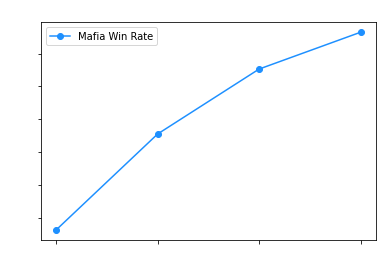

In [82]:
list_result = []
cycle = 5

def append_resultlist(num_mafia, num_civ,num_pol,num_doc):
    sum = 0.0
    avg = 0.0
    for i in range(cycle):
        mafia1 = Mafia_full(num_mafia,num_civ,num_pol,num_doc)
        sum += mafia1.process()
    
    avg = sum / cycle
    list_result.append(avg)
    
    
list_result = []
append_resultlist(1,7,1,1)
append_resultlist(2,6,1,1)
append_resultlist(3,5,1,1)
append_resultlist(4,4,1,1)

print(list_result)
list_full_10 = list_result

label = [1,2,3,4]

plt.plot(list(range(1,5)), list_result, color='dodgerblue', marker='o')
plt.title('Simple Mafia Game + Doctor,Police 1', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 50인 의사와 경찰이 추가된 단순한 마피아 게임

[6.4799999999999995, 14.4, 23.880000000000003, 34.50000000000001, 45.080000000000005, 55.480000000000004, 65.42, 74.05999999999999, 80.08, 87.17999999999999, 91.38, 94.53999999999999, 96.8, 98.5, 99.02000000000001, 99.7, 99.78, 99.96000000000001, 100.0, 99.97999999999999]


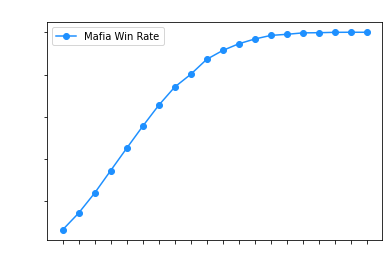

In [83]:
list_result = []

append_resultlist(1,39,5,5)
append_resultlist(2,38,5,5)
append_resultlist(3,37,5,5)
append_resultlist(4,36,5,5)
append_resultlist(5,35,5,5)
append_resultlist(6,34,5,5)
append_resultlist(7,33,5,5)
append_resultlist(8,32,5,5)
append_resultlist(9,31,5,5)
append_resultlist(10,30,5,5)
append_resultlist(11,29,5,5)
append_resultlist(12,28,5,5)
append_resultlist(13,27,5,5)
append_resultlist(14,26,5,5)
append_resultlist(15,25,5,5)
append_resultlist(16,24,5,5)
append_resultlist(17,23,5,5)
append_resultlist(18,22,5,5)
append_resultlist(19,21,5,5)
append_resultlist(20,20,5,5)

print(list_result)
list_full_50 = list_result

label = list(range(1,21))

plt.plot(list(range(1,21)), list_result, color='dodgerblue', marker='o')
plt.title('Simple Mafia Game + Doctor,Police 5', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Mafia Win Rate'])

plt.show()


### 총정리

### 가장 간단한 마피아 VS 수정한 간단한 마피아 10인

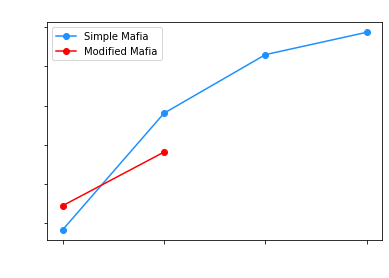

In [89]:
label = [1,2,3,4]

plt.plot(list(range(1,5)), list_simple_simple_10, color='dodgerblue', marker='o')
plt.plot(list(range(1,3)), list_modi_simple_10, color='r', marker='o')
plt.title('Simple Mafia VS Modified Mafia 10', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Modified Mafia'])

plt.show()

### 가장 간단한 마피아 VS 수정한 간단한 마피아 50인

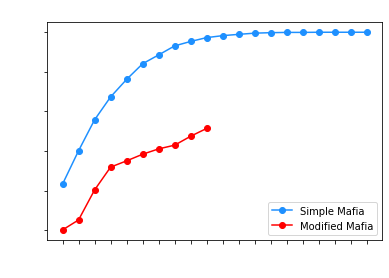

In [88]:
label = list(range(1,21))

plt.plot(list(range(1,21)), list_simple_simple_50, color='dodgerblue', marker='o')
plt.plot(list(range(1,11)), list_modi_simple_50, color='r', marker='o')
plt.title('Simple Mafia VS Modified Mafia 50', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Modified Mafia'])

plt.show()

In [ ]:
### 가장 간단한 마피아 VS 가장 간단한 마피아 + 경찰 10인

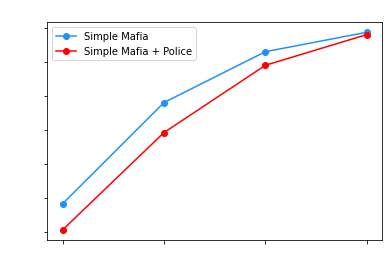

In [90]:
label = [1,2,3,4]

plt.plot(list(range(1,5)), list_simple_simple_10, color='dodgerblue', marker='o')
plt.plot(list(range(1,5)), list_simple_pol_10, color='r', marker='o')
plt.title('Simple Mafia VS Simple Mafia + Police 10', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Simple Mafia + Police'])

plt.show()

In [ ]:
### 가장 간단한 마피아 VS 가장 간단한 마피아 + 경찰 50인

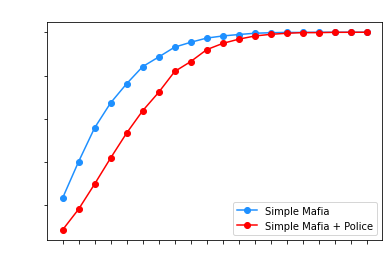

In [91]:
label = list(range(1,21))

plt.plot(list(range(1,21)), list_simple_simple_50, color='dodgerblue', marker='o')
plt.plot(list(range(1,21)), list_simple_pol_50, color='r', marker='o')
plt.title('Simple Mafia VS Simple Mafia + Police 50', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Simple Mafia + Police'])

plt.show()

In [ ]:
### 가장 간단한 마피아 + 경찰 VS 수정한 마피아 + 경찰 10인

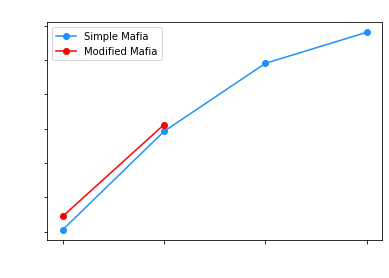

In [92]:
label = [1,2,3,4]

plt.plot(list(range(1,5)), list_simple_pol_10, color='dodgerblue', marker='o')
plt.plot(list(range(1,3)), list_modi_pol_10, color='r', marker='o')
plt.title('Simple Mafia + Police VS Modified Mafia + Police 10', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Modified Mafia'])

plt.show()

In [ ]:
### 가장 간단한 마피아 + 경찰 VS 수정한 마피아 + 경찰 50인

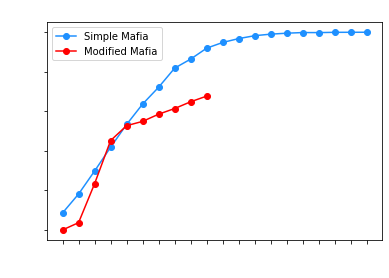

In [93]:
label = list(range(1,21))

plt.plot(list(range(1,21)), list_simple_pol_50, color='dodgerblue', marker='o')
plt.plot(list(range(1,11)), list_modi_pol_50, color='r', marker='o')
plt.title('Simple Mafia + Police VS Modified Mafia + Police 50', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Modified Mafia'])

plt.show()

In [ ]:
### 가장 간단한 마피아 VS 가장 간단한 마피아 + 의사 10인

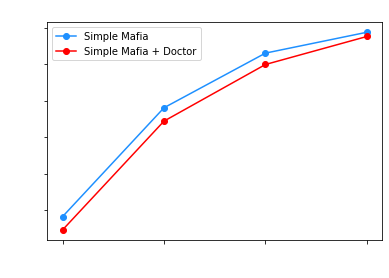

In [96]:
label = [1,2,3,4]

plt.plot(list(range(1,5)), list_simple_simple_10, color='dodgerblue', marker='o')
plt.plot(list(range(1,5)), list_doc_10, color='r', marker='o')
plt.title('Simple Mafia VS Simple Mafia + Doctor 10', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Simple Mafia + Doctor'])

plt.show()

In [ ]:
### 가장 간단한 마피아 VS 가장 간단한 마피아 + 의사 50인

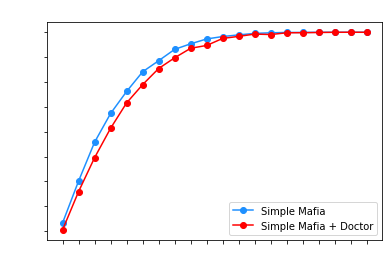

In [97]:
label = list(range(1,21))

plt.plot(list(range(1,21)), list_simple_simple_50, color='dodgerblue', marker='o')
plt.plot(list(range(1,21)), list_doc_50, color='r', marker='o')
plt.title('Simple Mafia VS Simple Mafia + Doctor 50', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Simple Mafia + Doctor'])

plt.show()

In [ ]:
### 가장 간단한 마피아 VS 가장 간단한 마피아 + 경찰 + 의사 10인

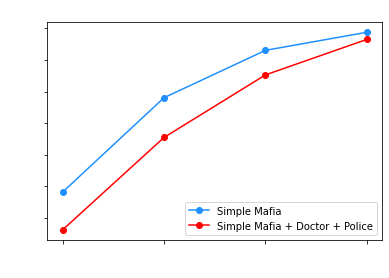

In [98]:
label = [1,2,3,4]

plt.plot(list(range(1,5)), list_simple_simple_10, color='dodgerblue', marker='o')
plt.plot(list(range(1,5)), list_full_10, color='r', marker='o')
plt.title('Simple Mafia VS Simple Mafia + Doctor + Police 10', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Simple Mafia + Doctor + Police'])

plt.show()

In [ ]:
### 가장 간단한 마피아 VS 가장 간단한 마피아 + 경찰 + 의사 50인

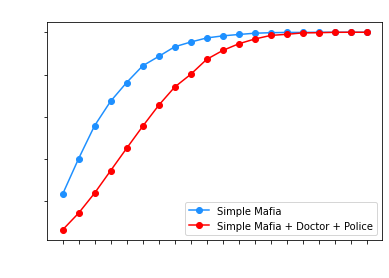

In [100]:
label = list(range(1,21))

plt.plot(list(range(1,21)), list_simple_simple_50, color='dodgerblue', marker='o')
plt.plot(list(range(1,21)), list_full_50, color='r', marker='o')
plt.title('Simple Mafia VS Simple Mafia + Doctor + Police 50', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia','Simple Mafia + Doctor + Police'])

plt.show()

In [ ]:
### 가장 간단한 마피아 + 경찰 VS 가장 간단한 마피아 + 경찰 + 의사 10인

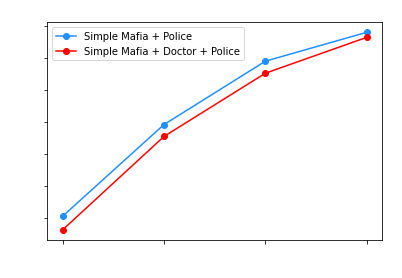

In [101]:
label = [1,2,3,4]

plt.plot(list(range(1,5)), list_simple_pol_10, color='dodgerblue', marker='o')
plt.plot(list(range(1,5)), list_full_10, color='r', marker='o')
plt.title('Simple Mafia + Police VS Simple Mafia + Doctor + Police 10', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia + Police','Simple Mafia + Doctor + Police'])

plt.show()

In [ ]:
### 가장 간단한 마피아 + 경찰 VS 가장 간단한 마피아 + 경찰 + 의사 50인

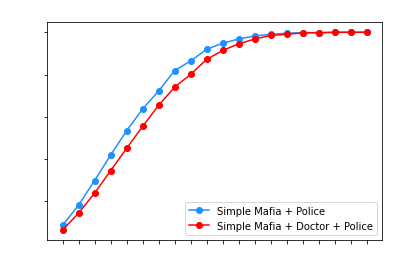

In [102]:
label = list(range(1,21))

plt.plot(list(range(1,21)), list_simple_pol_50, color='dodgerblue', marker='o')
plt.plot(list(range(1,21)), list_full_50, color='r', marker='o')
plt.title('Simple Mafia + Police VS Simple Mafia + Doctor + Police 50', color = 'w')
plt.xlabel('Number of Mafia Members', color = 'w')
plt.ylabel('Mafia Team Win Rate', color = 'w')
plt.xticks(label, color = 'w')
plt.yticks(color = 'w')
plt.legend(['Simple Mafia + Police','Simple Mafia + Doctor + Police'])

plt.show()